<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_2_4_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_2.4_n20.csv',
 'data_add_delta_2.4_n30.csv',
 'data_add_delta_2.4_n60.csv',
 'data_add_delta_2.4_n120.csv',
 'data_add_delta_2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.133239,82.729403,77.419120,37256.313053,37513.594814,-6698.987602,44212.582416
1,0.0,1.0,84.572548,79.878097,46.660153,-6041.965625,-5820.854827,-8446.702572,2625.847745
2,0.0,2.0,68.858842,36.262025,53.244369,4537.957843,4706.323079,904.237138,3802.085941
3,0.0,3.0,79.256127,94.946780,49.819115,-42484.578736,-42250.556714,-10669.926411,-31580.630303
4,0.0,4.0,27.437914,85.585396,81.425827,10642.671790,10847.120927,-3675.150775,14522.271702
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,27.524773,92.657558,83.000817,-68474.760156,-68261.577008,-4066.765199,-64194.811809
249996,999.0,246.0,40.942405,20.419067,44.778882,-949.230800,-833.090446,-4327.386490,3494.296044
249997,999.0,247.0,87.669393,73.683436,93.480834,-9377.616305,-9112.782641,5885.465982,-14998.248624
249998,999.0,248.0,56.457973,89.844582,99.137246,65804.507067,66059.946867,1763.488404,64296.458463


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.133239,82.729403,77.419120,37256.313053,37513.594814,-6698.987602,44212.582416
1,0.0,1.0,84.572548,79.878097,46.660153,-6041.965625,-5820.854827,-8446.702572,2625.847745
2,0.0,2.0,68.858842,36.262025,53.244369,4537.957843,4706.323079,904.237138,3802.085941
3,0.0,3.0,79.256127,94.946780,49.819115,-42484.578736,-42250.556714,-10669.926411,-31580.630303
4,0.0,4.0,27.437914,85.585396,81.425827,10642.671790,10847.120927,-3675.150775,14522.271702
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,27.524773,92.657558,83.000817,-68474.760156,-68261.577008,-4066.765199,-64194.811809
249996,999.0,246.0,40.942405,20.419067,44.778882,-949.230800,-833.090446,-4327.386490,3494.296044
249997,999.0,247.0,87.669393,73.683436,93.480834,-9377.616305,-9112.782641,5885.465982,-14998.248624
249998,999.0,248.0,56.457973,89.844582,99.137246,65804.507067,66059.946867,1763.488404,64296.458463


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    87.133239  82.729403  ...  -6698.987602  44212.582416
      1.0    84.572548  79.878097  ...  -8446.702572   2625.847745
      2.0    68.858842  36.262025  ...    904.237138   3802.085941
      3.0    79.256127  94.946780  ... -10669.926411 -31580.630303
      4.0    27.437914  85.585396  ...  -3675.150775  14522.271702
...                ...        ...  ...           ...           ...
999.0 245.0  27.524773  92.657558  ...  -4066.765199 -64194.811809
      246.0  40.942405  20.419067  ...  -4327.386490   3494.296044
      247.0  87.669393  73.683436  ...   5885.465982 -14998.248624
      248.0  56.457973  89.844582  ...   1763.488404  64296.458463
      249.0  24.244220  32.432260  ...  -9235.845345     -9.936788

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    87.133239  82.729403  ...  -6698.987602  44212.582416
      1.0    84.572548  79.878097  ...  -8446.702572   2625.847745
      2.0    68.858842  36.262025  ...    904.237138   3802.085941
      3.0    79.256127  94.946780  ... -10669.926411 -31580.630303
      4.0    27.437914  85.585396  ...  -3675.150775  14522.271702
...                ...        ...  ...           ...           ...
999.0 245.0  27.524773  92.657558  ...  -4066.765199 -64194.811809
      246.0  40.942405  20.419067  ...  -4327.386490   3494.296044
      247.0  87.669393  73.683436  ...   5885.465982 -14998.248624
      248.0  56.457973  89.844582  ...   1763.488404  64296.458463
      249.0  24.244220  32.432260  ...  -9235.845345     -9.936788

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.133239,82.729403,77.419120,37256.313053,37513.594814,-6698.987602,44212.582416
1,0.0,1.0,84.572548,79.878097,46.660153,-6041.965625,-5820.854827,-8446.702572,2625.847745
2,0.0,2.0,68.858842,36.262025,53.244369,4537.957843,4706.323079,904.237138,3802.085941
3,0.0,3.0,79.256127,94.946780,49.819115,-42484.578736,-42250.556714,-10669.926411,-31580.630303
4,0.0,4.0,27.437914,85.585396,81.425827,10642.671790,10847.120927,-3675.150775,14522.271702
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,27.524773,92.657558,83.000817,-68474.760156,-68261.577008,-4066.765199,-64194.811809
249996,999.0,246.0,40.942405,20.419067,44.778882,-949.230800,-833.090446,-4327.386490,3494.296044
249997,999.0,247.0,87.669393,73.683436,93.480834,-9377.616305,-9112.782641,5885.465982,-14998.248624
249998,999.0,248.0,56.457973,89.844582,99.137246,65804.507067,66059.946867,1763.488404,64296.458463


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    87.133239  82.729403  ...  -6698.987602  44212.582416
      1.0    84.572548  79.878097  ...  -8446.702572   2625.847745
      2.0    68.858842  36.262025  ...    904.237138   3802.085941
      3.0    79.256127  94.946780  ... -10669.926411 -31580.630303
      4.0    27.437914  85.585396  ...  -3675.150775  14522.271702
...                ...        ...  ...           ...           ...
999.0 245.0  27.524773  92.657558  ...  -4066.765199 -64194.811809
      246.0  40.942405  20.419067  ...  -4327.386490   3494.296044
      247.0  87.669393  73.683436  ...   5885.465982 -14998.248624
      248.0  56.457973  89.844582  ...   1763.488404  64296.458463
      249.0  24.244220  32.432260  ...  -9235.845345     -9.936788

[250000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

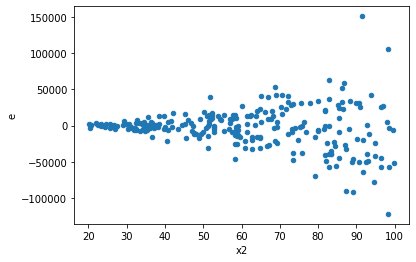

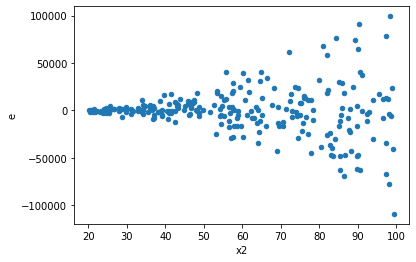

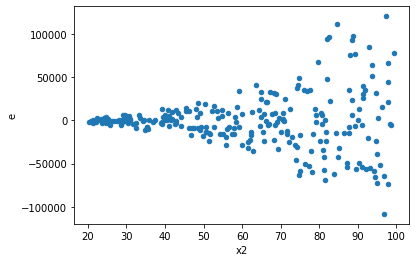

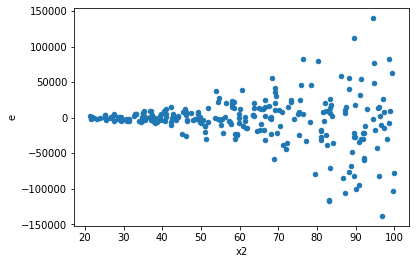

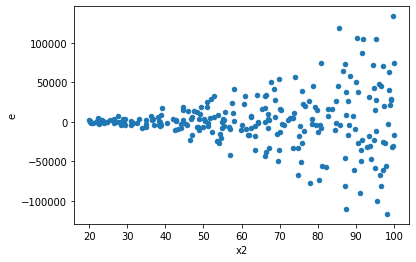

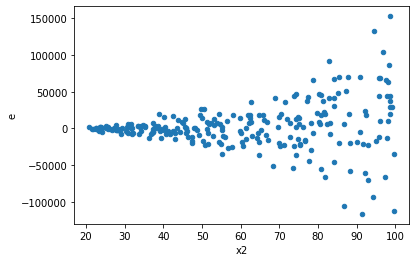

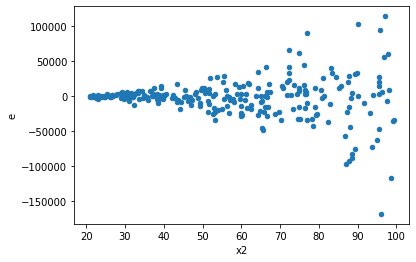

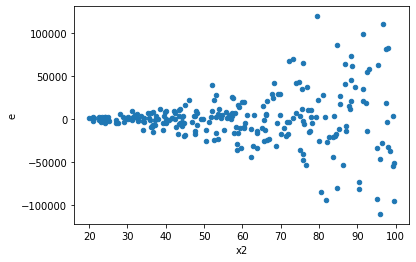

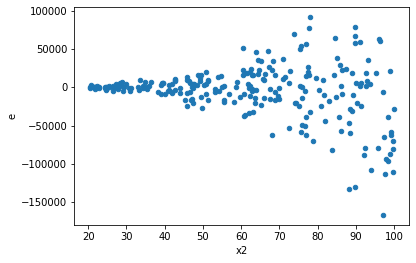

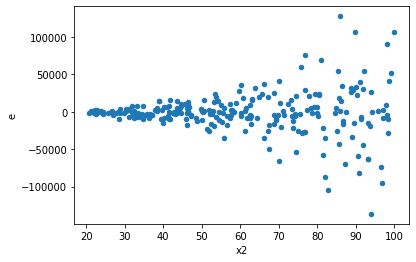

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,97.0,97.0,157721601374.85962,8276080892.932495,1642933347.6547878,86209175.96804683,19.057522928461072,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,133390254336.02013,2603001447.0582666,1389481816.0002096,27114598.406856943,51.244786854332574,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,224981334471.83325,5974886917.305889,2343555567.41493,62238405.38860301,37.65449247586407,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,244833568909.738,7672018846.323399,2550349676.143104,79916862.9825354,31.91253486389279,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,260083146159.93417,9017006056.211975,2709199439.165981,93927146.41887474,28.843625538075166,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,223306143346.01556,5129915189.766377,2326105659.8543286,53436616.56006643,43.53018229063261,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,189087481203.91226,3354675570.7519326,1969661262.5407526,34944537.19533263,56.365355521258145,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,211124145299.85727,5591221255.068707,2199209846.873513,58241888.07363237,37.75993395154291,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,230053072795.0768,6340964846.834267,2396386174.9487166,66051717.15452361,36.28045232105821,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,157721601374.85962,8276080892.932495,1642933347.6547878,86209175.96804683,19.057522928461072,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,133390254336.02013,2603001447.0582666,1389481816.0002096,27114598.406856943,51.244786854332574,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,224981334471.83325,5974886917.305889,2343555567.41493,62238405.38860301,37.65449247586407,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,244833568909.738,7672018846.323399,2550349676.143104,79916862.9825354,31.91253486389279,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,260083146159.93417,9017006056.211975,2709199439.165981,93927146.41887474,28.843625538075166,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,223306143346.01556,5129915189.766377,2326105659.8543286,53436616.56006643,43.53018229063261,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,189087481203.91226,3354675570.7519326,1969661262.5407526,34944537.19533263,56.365355521258145,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,211124145299.85727,5591221255.068707,2199209846.873513,58241888.07363237,37.75993395154291,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,230053072795.0768,6340964846.834267,2396386174.9487166,66051717.15452361,36.28045232105821,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64